To study and apply Data Preprocessing techniques on given dataset.
Prepare a titanic dataset for training with machine learning algorithm by applying suitable data preprocessing techniques.
• Perform basic EDA using functions like head(), tail(), describe(), shape.
• Identify & handle missing value.
• Check for duplicates and handle it.
• Identify outliers & handle it.
• Apply data encoding technique on suitable attribute.
• Apply Univariate, Bivariate & Multivariate analysis
• Apply feature scaling technique on suitable attribute.
• Split the dataset in the ratio of 80:20

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(891, 12)

In [69]:
median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)
mode_embarked = df["Embarked"].mode()[0]  
df["Embarked"] = df["Embarked"].fillna(mode_embarked)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: >

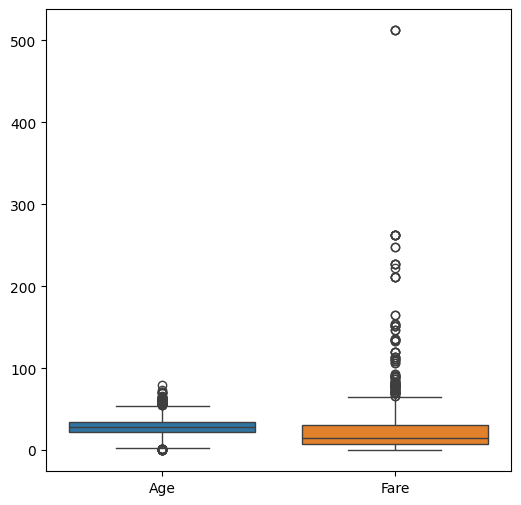

In [46]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[["Age", "Fare"]])

In [22]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list


for i in ['Age', 'Fare']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "atttibute :", outliers)

Outliers in Age atttibute : [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
Outliers in Fare atttibute : [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 12

<Axes: >

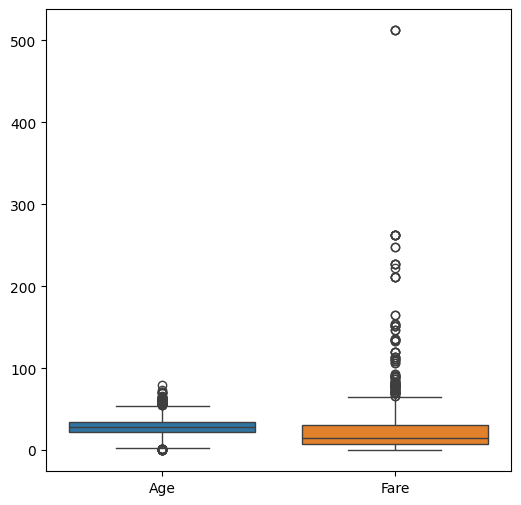

In [47]:
plt.figure(figsize=(6, 6))
sns.boxplot(data = df[["Age", "Fare"]])

In [24]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [25]:
df["Sex"] = df["Sex"].replace("male", 0)

In [26]:
df["Sex"] = df["Sex"].replace("female", 1)

In [27]:
df["Embarked"].unique()

array(['S', 'C', 'Q', '0    S\nName: Embarked, dtype: object'],
      dtype=object)

In [28]:
df["Embarked"] = df["Embarked"].replace("S", 0)

In [29]:
df["Embarked"] = df["Embarked"].replace("C", 1)

In [30]:
df["Embarked"] = df["Embarked"].replace("Q", 2)

In [31]:
df["Embarked"] = df["Embarked"].replace("0 S\ndtype: object", 0)

In [32]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


<Axes: ylabel='count'>

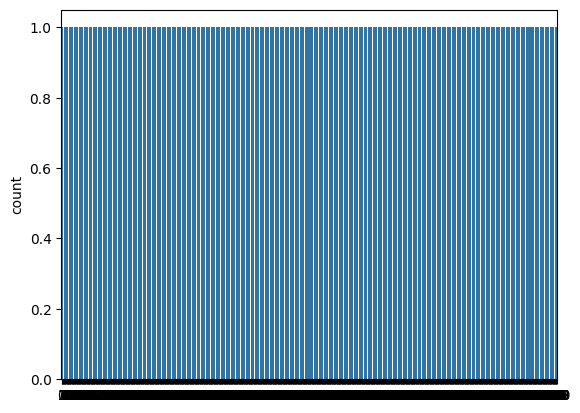

In [33]:
# Sex column
sns.countplot(df["Sex"])

In [34]:
gender = round(df["Sex"].value_counts().values[0]/891*100)

In [35]:
# Observation
print("Out of 891 {} % passengers are male".format(gender))

Out of 891 65 % passengers are male


<Axes: ylabel='count'>

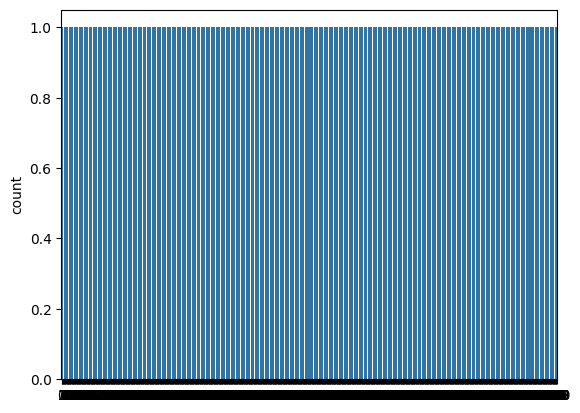

In [36]:
# cp Column
sns.countplot(df["Fare"])

In [37]:
no_fare = round(df["Fare"].value_counts().values[0]/891*100)
fare = round(df["Fare"].value_counts().values[1] + df["Fare"].value_counts().values[2])

In [38]:
# Observation
print("Out of 891 {} %", format(no_fare))
print("Out of 891 {} %", format(fare))

Out of 891 {} % 5
Out of 891 {} % 80


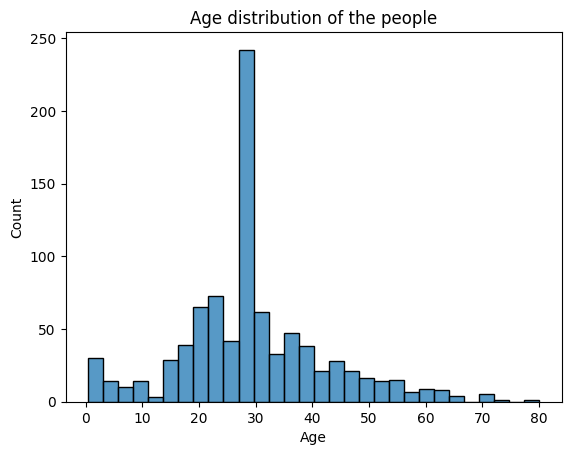

In [39]:
sns.histplot(df.Age)
plt.title("Age distribution of the people")
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

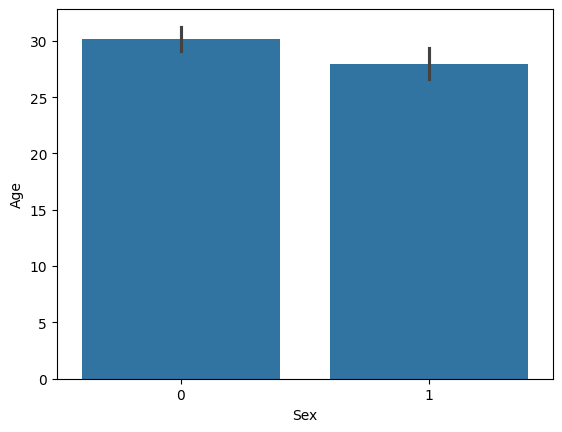

In [40]:
sns.barplot(x = "Sex", y = "Age", data = df)

<Axes: xlabel='Age', ylabel='Fare'>

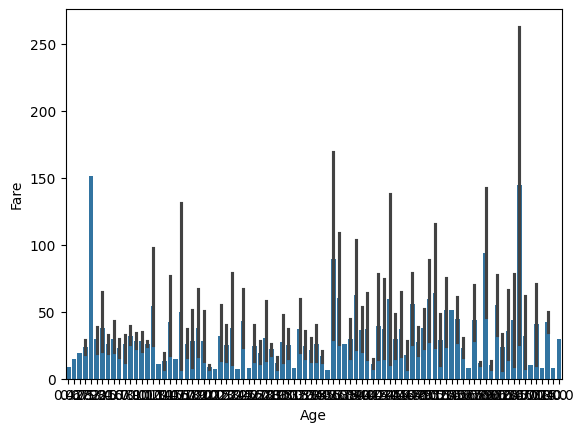

In [41]:
sns.barplot(x = "Age", y = "Fare", data = df)

<Axes: xlabel='Age', ylabel='Fare'>

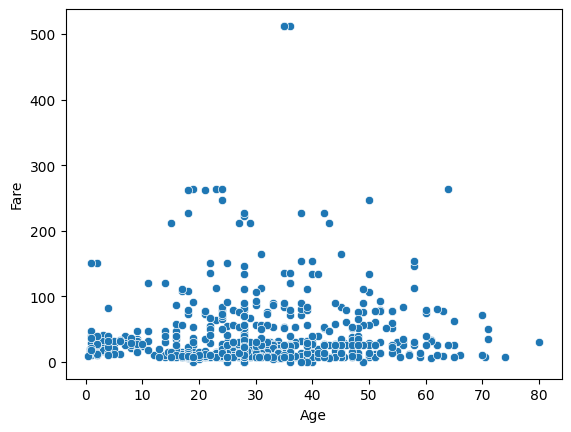

In [42]:
sns.scatterplot(x = "Age", y = "Fare", data = df)

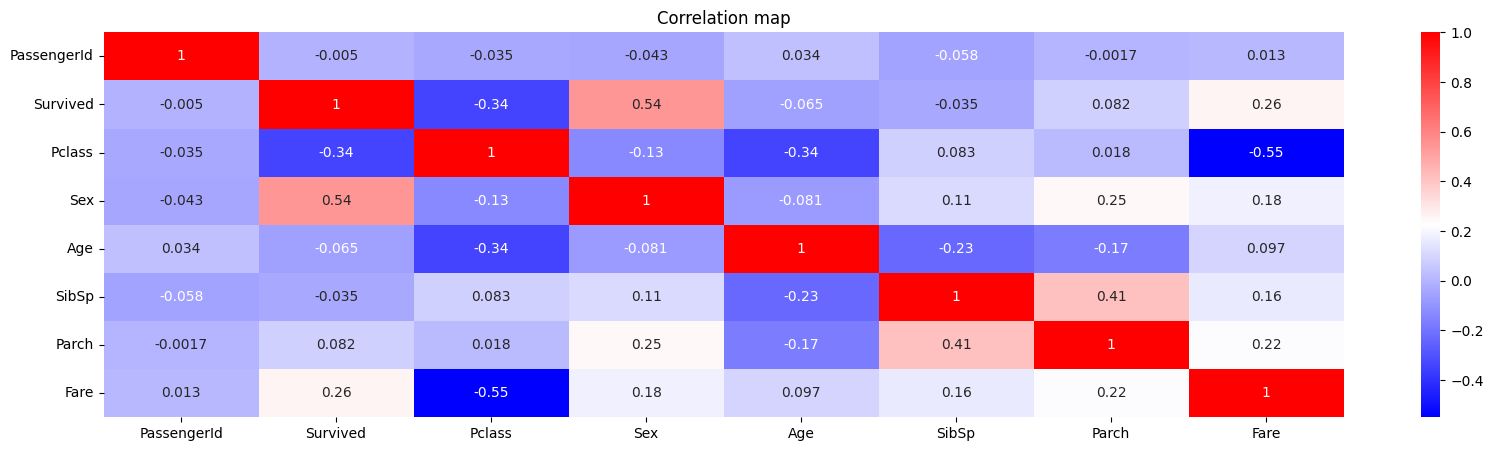

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric data is used
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().fillna(0)

# Plot the heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(corr_matrix, annot=True, cmap="bwr")
plt.title("Correlation map")
plt.show()


Text(0.5, 1.0, 'Correlation map')

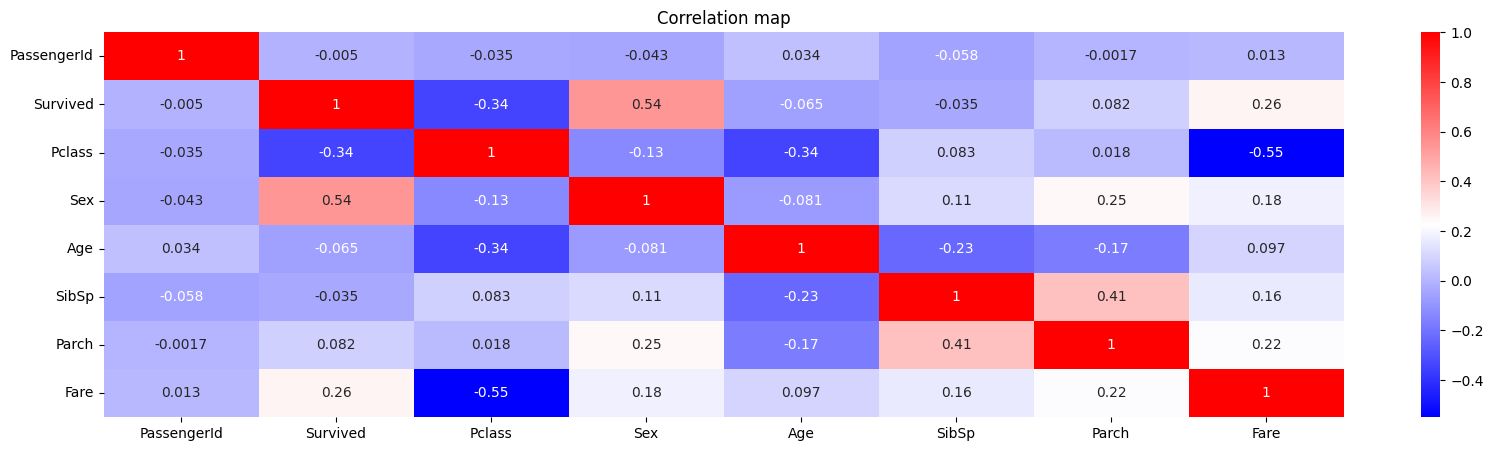

In [53]:
plt.figure(figsize=(20, 5));
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap = "bwr");
plt.title("Correlation map")

In [ ]:
# It is used to plot pairwise relationship between variables within a dataset.
# It is applicable to numeric columns only.

In [58]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Sort correlation values for the 'Survived' column
if 'Survived' in corr_matrix.columns:
    print(corr_matrix["Survived"].sort_values(ascending=False))
else:
    print("The 'Survived' column is not in the numeric data.")


Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


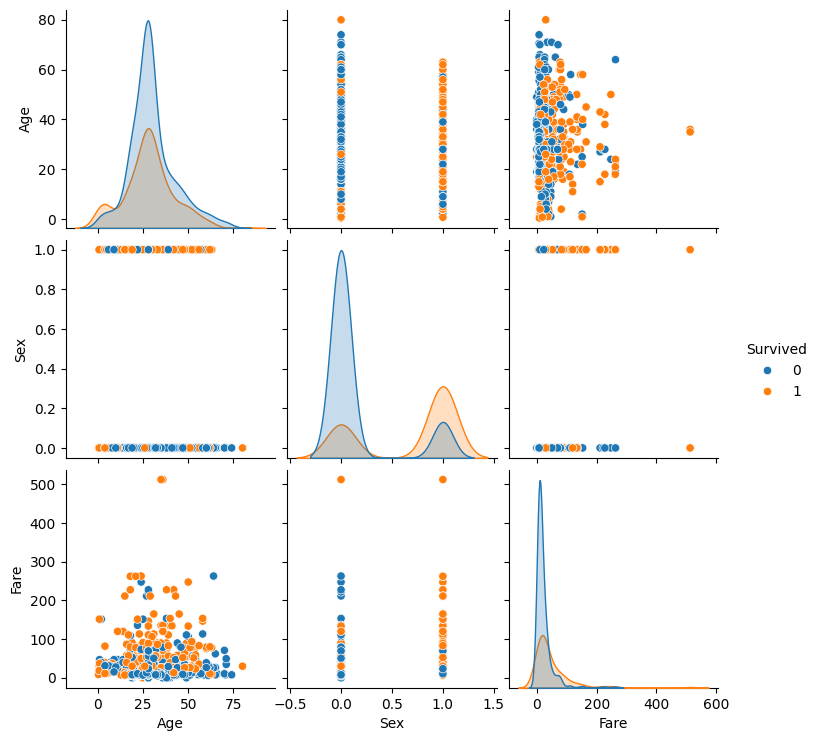

In [59]:
sns.pairplot(df[["Age", "Sex", "Fare", "Survived"]], hue="Survived") # name of dependent variables

In [60]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0


In [61]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [64]:
import pandas as pd

# Feature columns
feature_cols = ["Age", "Sex", "Fare", "Embarked"]

# Extract features (X) and target variable (y)
X = df[feature_cols]
y = df['Survived']

# Convert categorical variables into numeric (one-hot encoding)
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)

# Display the first few rows of X to check
print(X.head())


    Age     Fare  Sex_1  Embarked_1  Embarked_2  \
0  22.0   7.2500  False       False       False   
1  38.0  71.2833   True        True       False   
2  26.0   7.9250   True       False       False   
3  35.0  53.1000   True       False       False   
4  35.0   8.0500  False       False       False   

   Embarked_0    S\nName: Embarked, dtype: object  
0                                           False  
1                                           False  
2                                           False  
3                                           False  
4                                           False  


In [63]:
# Split dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# 80% training and 20% testing
X_train.shape

(712, 4)

In [65]:
X_test.shape

(179, 4)